In [ ]:
!pip install textblob
!pip install wordcloud
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('mypertamna.csv')

In [ ]:
df.head()

,Teksbersih,translate
0,alun al kahfi malam moga allah rahmat jalan ba...,Alun Al Kahfi Night Moga Allah Rahmat Jalan Ba...
1,beli bensin dah pake apk,buy gasoline already using apk
2,warga kota tasikmalaya pilih beli bbm spbu dae...,Residents of the City of Tasikmalaya Choose Bu...
3,tuku bbm subsidi sing kudu nganggo aplikasi,Tuku BBM Subsidized Sing Kudu Nganggo The App...
4,daftar subsidi tp ga save data kendara ny mu e...,list of subsidies but not saving data kendara ...


In [ ]:
ps = PorterStemmer()

def stemming_data(x):
    return ps.stem(x)

df['translate'] = df['translate'].apply(stemming_data)

In [ ]:
dataset = list(df['translate'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(dataset):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0:
        total_positif += 1
        status.append('positive')
    # elif analysis.sentiment.polarity == 0:
    #     total_netral += 1
    #     status.append('neutral')
    else:
        total_negatif += 1
        status.append('negative')

    total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 1946
Netral = 0
Negatif = 4792

Total Data : 6738


In [ ]:
status = pd.DataFrame({'klasifikasi': status})
df['klasifikasi'] = status
df

,Teksbersih,translate,klasifikasi
0,alun al kahfi malam moga allah rahmat jalan ba...,alun al kahfi night moga allah rahmat jalan ba...,negative
1,beli bensin dah pake apk,buy gasoline already using apk,negative
2,warga kota tasikmalaya pilih beli bbm spbu dae...,residents of the city of tasikmalaya choose bu...,negative
3,tuku bbm subsidi sing kudu nganggo aplikasi,tuku bbm subsidized sing kudu nganggo the appl,negative
4,daftar subsidi tp ga save data kendara ny mu e...,list of subsidies but not saving data kendara ...,negative
...,...,...,...
6733,halah yg curang kontrol isi minyak jarak aja k...,halah who cheats control the contents of the c...,negative
6734,app tolong bang brando kumandang alias serang...,app please bang brando kumandang aka attackin...,negative
6735,kerja hasil nya,'s work result,negative
6736,lha jaring internet aja remang rata bikin atur...,"lha, the internet nets are just even flat, mak...",negative


In [ ]:
def show_pie(label, data, legend_title) :
    fig, ax = plt.subplots(figsize=(8, 10), subplot_kw=dict(aspect='equal'))

    labels = [x.split()[-1] for x in label]

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}% ({:d})".format(pct, absolute)

    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                      textprops=dict(color="w"))

    ax.legend(wedges, labels,
              title= legend_title,
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=10, weight="bold")
    plt.show()

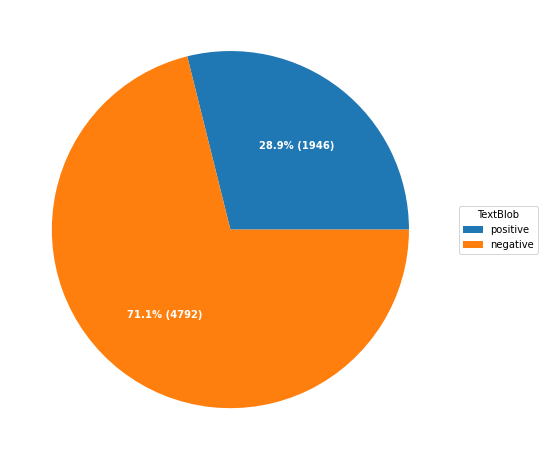

In [ ]:
# label = ['positive', 'negative', 'neutral']
# count_data = [total_positif+1, total_negatif+1, total_netral]

label = ['positive', 'negative']
count_data = [total_positif+1, total_negatif+1]

show_pie(label, count_data, "TextBlob")

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud)
    plt.axis("off");

In [ ]:
all_words = ' '.join(str([Teksbersih for Teksbersih in df["Teksbersih"]]))
wordcloud = WordCloud(width = 3000, height = 2000, random_state=3, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(all_words)
plot_cloud(wordcloud)

In [ ]:
status.to_excel('mypertaminalabel.xlsx',index=False)

In [ ]:
df.to_csv('mypertamina.csv',index=False)

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

neg = np.array(Image.open('minus.jpg'))
pos = np.array(Image.open('plus.jpg'))
# net = np.array(Image.open('netral.jpg'))

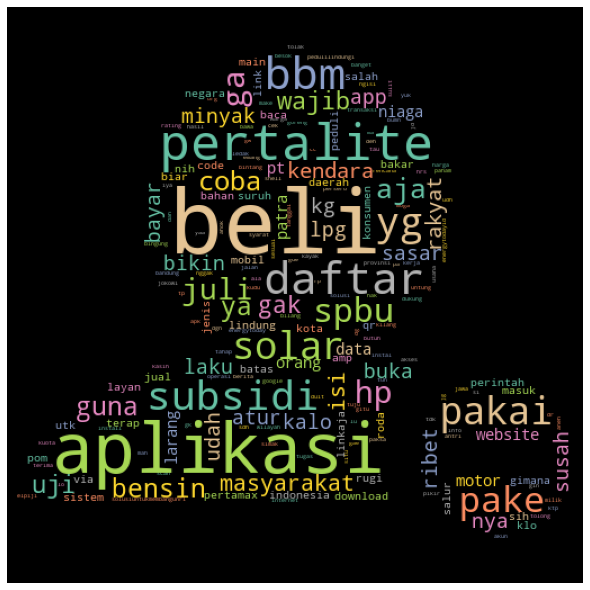

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)
for val in df[df.klasifikasi == "negative"].Teksbersih.values:

    val = str(val)

    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(
        width=1000,
        height=500,
        random_state=123,
        background_color="black",
        min_font_size = 3,
        colormap="Set2",
        collocations=False,
        stopwords=STOPWORDS,
        mask=neg).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

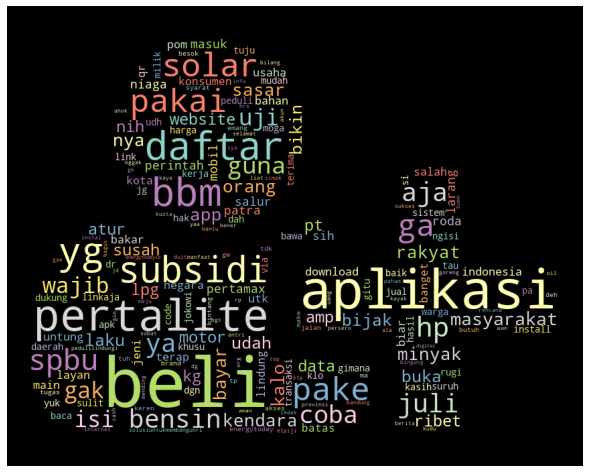

In [ ]:
for val in df[df.klasifikasi == "positive"].Teksbersih.values:

    val = str(val)

    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(
        width=1000,
        height=500,
        random_state=123,
        background_color="black",
        min_font_size = 3,
        colormap="Set3",
        collocations=False,
        stopwords=STOPWORDS,
        mask=pos).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

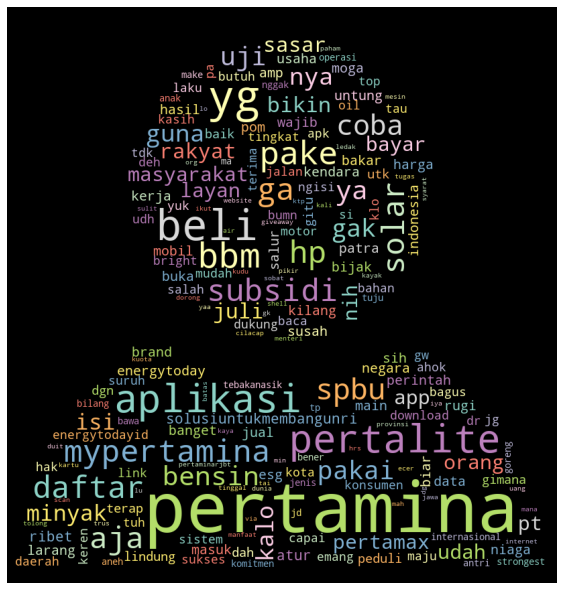

In [ ]:
for val in df[df.klasifikasi == "neutral"].Teksbersih.values:

    val = str(val)

    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(
        width=1000,
        height=500,
        random_state=123,
        background_color="black",
        min_font_size = 3,
        colormap="Set3",
        collocations=False,
        stopwords=STOPWORDS,
        mask=net).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
dataset = df.drop(['Tweet'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [ ]:
import random

set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
    if(n[1] == 'positive'):
      set_positif.append(n)
    elif(n[1] == 'negative'):
      set_negatif.append(n)
    else:
      set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
     train_set.append(n)

In [ ]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print('Akurasi Test:', cl.accuracy(dataset))

ValueError: ignored

In [ ]:
dataset = list(df['Translate'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(dataset):
    analysis = TextBlob(tweet, classifier=cl)

    if analysis.classify() == 'positive':
        total_positif += 1
    elif analysis.classify() == 'neutral':
        total_netral += 1
    else:
        total_negatif += 1

    status.append(analysis.classify())
    total += 1

print(f'\nHasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')